# EDA and Preprocessing Pipelines- Heart Disease Prediction
This notebook performs exploratory data analysis (EDA) on the Heart Disease Prediction dataset and then builds preprocessing pipelines for both numerical and categorical features.

The dataset contains clinical information from 270 patients, including a label that indicates whether each patient has heart disease or not. The objective is to use the available features to predict the presence or absence of heart disease, making this a binary classification problem.

The dataset was obtained from Kaggle:
https://www.kaggle.com/datasets/neurocipher/heartdisease



In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer

In [69]:
data = pd.read_csv('../data/Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


## Basic information and statistics
The .info() method provides a quick overview of the dataset, including the number of non-null values and the data type of each column.

In [70]:
#overview of dataset
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

The .describe() method can also be used to obtain summary statistics for the numerical columns in the dataset. The output is transposed to make it easier to read.

In [71]:
#summary statistics for numerical columns in dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


### Column Descriptions

In total we have 14 columns:
- **Age**: Age of the patient in years
- **Sex**: Gender of the patient (1 = Male, 0 = Female)
- **Chest pain type**: Type of chest pain experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- **BP**: Resting blood pressure (mm Hg)
- **Cholesterol**: Serum cholesterol level (mg/dl)
- **FBS over 120**: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- **EKG results**: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
- **Max HR**: Maximum heart rate achieved during exercise
- **Exercise angina**: Exercise-induced angina (1 = Yes, 0 = No)
- **ST depression**: ST depression induced by exercise relative to rest
- **Slope of ST**: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- **Number of vessels fluro**: Number of major vessels colored by fluoroscopy (0-3)
- **Thallium**: Thallium stress test result (3 = normal, 6 = fixed defect, 7 = reversible defect)
- **Heart Disease**: Target variable (Presence / Absence)

#### Selected Features

For this analysis, we will use all clinical features to predict the target variable Heart Disease. Unlike some datasets, all columns here carry clinical significance and can contribute to the prediction, so none will be dropped before the EDA phase.
The features are grouped as follows:
- Numerical (continuous): Age, BP, Cholesterol, Max HR, ST depression
- Categorical (discrete/ordinal): Sex, Chest pain type, FBS over 120, EKG results, Exercise angina, Slope of ST, Number of vessels fluro, Thallium

## Visualization of Numerical Features
The distributions of the continuous numerical features are visualized using histograms with kernel density estimates (KDE).

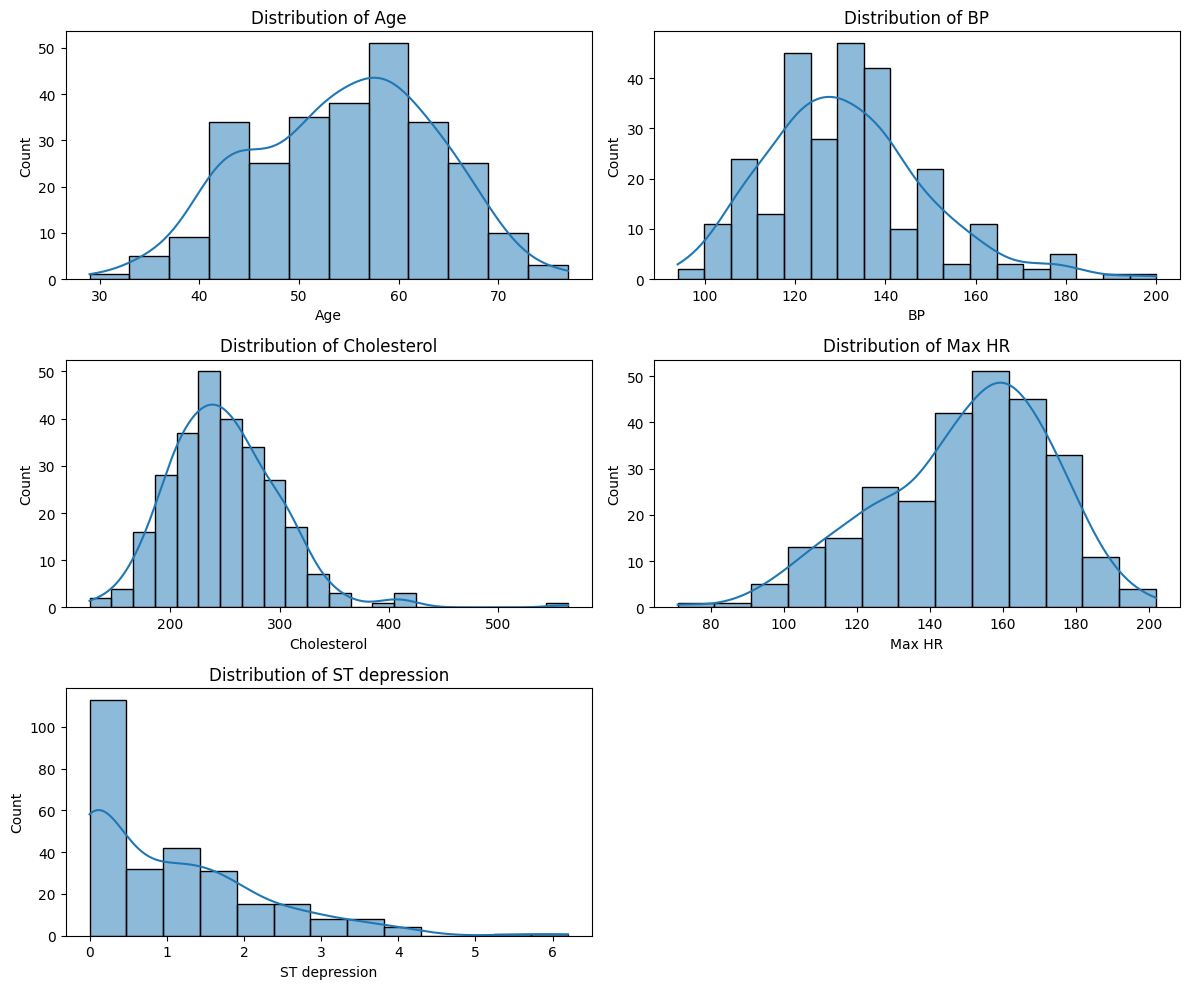

In [72]:
#distributions of the continuous numerical features using histograms with KDE
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

axs[2, 1].set_visible(False)

fig.tight_layout()

#### Observations on Numerical Features

- Age has a distribution close to normal, centered around 55 years old. Most patients are between 40 and 65 years.
- BP (resting blood pressure) is also roughly normally distributed around 130 mm Hg, with a slight skew to the right.
- Cholesterol is centered around 245 mg/dl, but there are some noticeable high outliers.
- Max HR looks fairly normally distributed, with most values around 150 bpm.
- ST depression is strongly right-skewed. Most values are close to 0, with a long tail toward higher values. A transformation (such as a power transformation) could help reduce this skewness.

Since these features have different value ranges, scaling will be necessary so they are on a similar scale before training the model.

## Visualization of Categorical Features
The distributions of the categorical features in the dataset are shown using countplots.

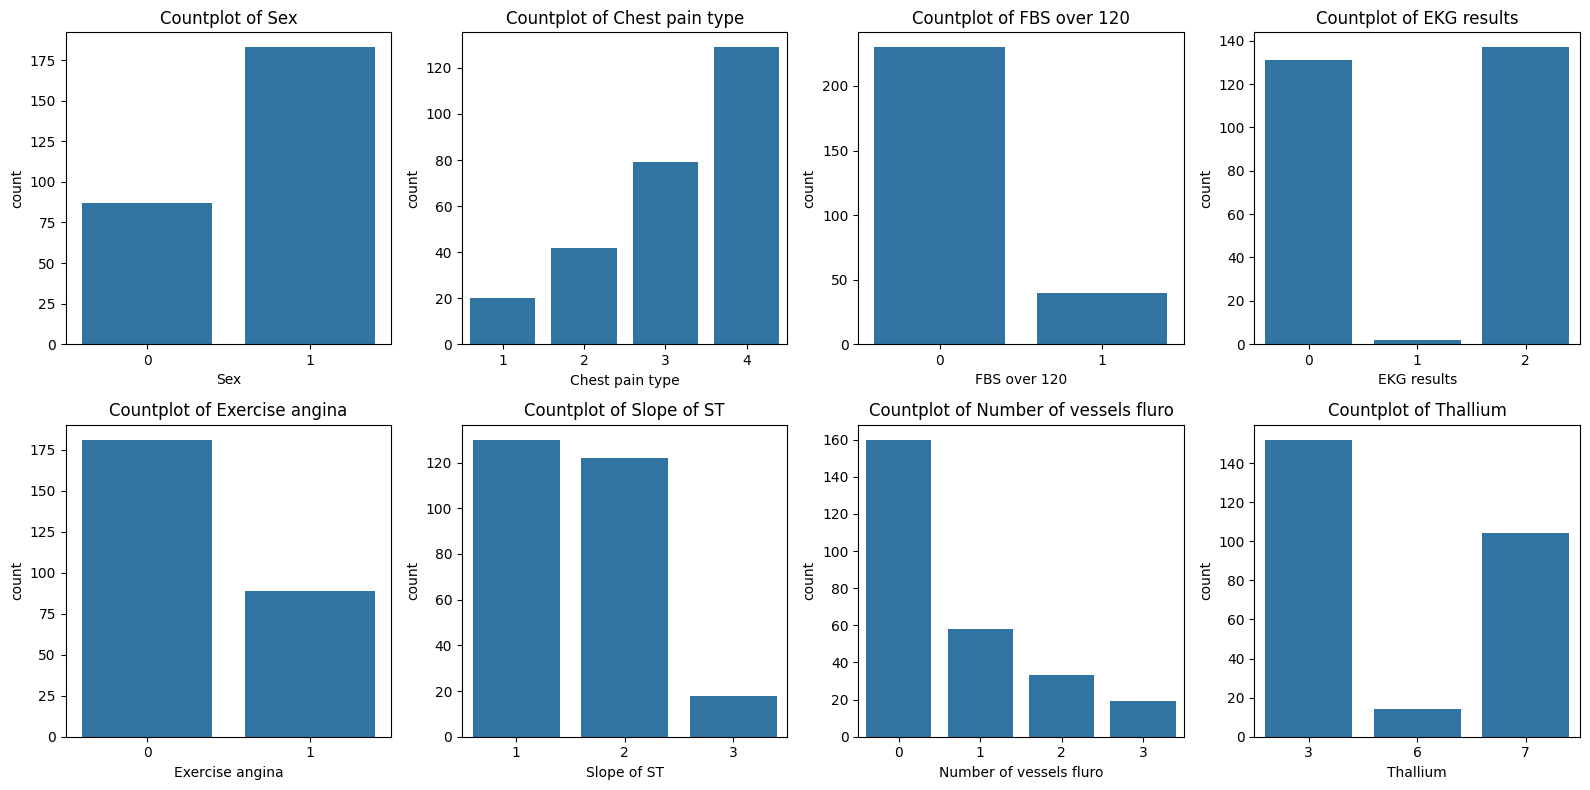

In [73]:
categorical_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                     'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

### Observations con Categorical Features
- Sex: There are more male patients (1) than female patients (0).
- Chest pain type: Type 4 (asymptomatic) appears most often, followed by type 3 (non-anginal pain).
- FBS over 120: Most patients have fasting blood sugar below 120 mg/dl.
- EKG results: Categories 0 (normal) and 2 (left ventricular hypertrophy) are the most common.
- Exercise angina: The majority of patients did not experience exercise-induced angina.
- Slope of ST: Category 2 (flat) is the most frequent.
- Number of vessels fluro: Most patients have 0 major vessels colored by fluoroscopy.
- Thallium: Categories 3 (normal) and 7 (reversible defect) appear most frequently.

Most of these categorical features are already represented with integers, so they can stay that way in the preprocessing step. The only column that needs to be encoded is the target variable Heart Disease, since it contains text values instead of numbers.

##  Target Label Distribution
The distribution of the target label, Heart Disease, is visualized to understand the class balance in the dataset.

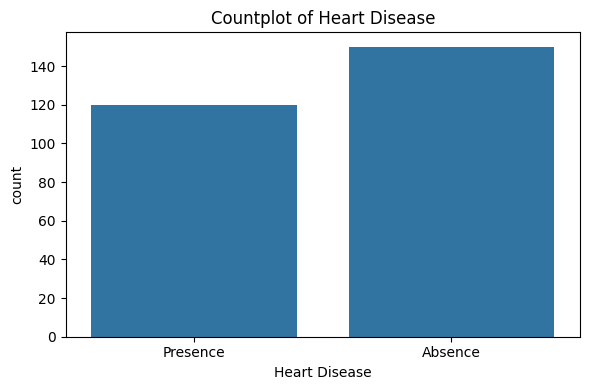

In [74]:
#distribution of target label Heart Disease
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Heart Disease')
plt.title('Countplot of Heart Disease')
plt.tight_layout()

The distributions of each feature can be compared between patients with and without heart disease. For numerical features, boxplots are used to clearly show these differences.

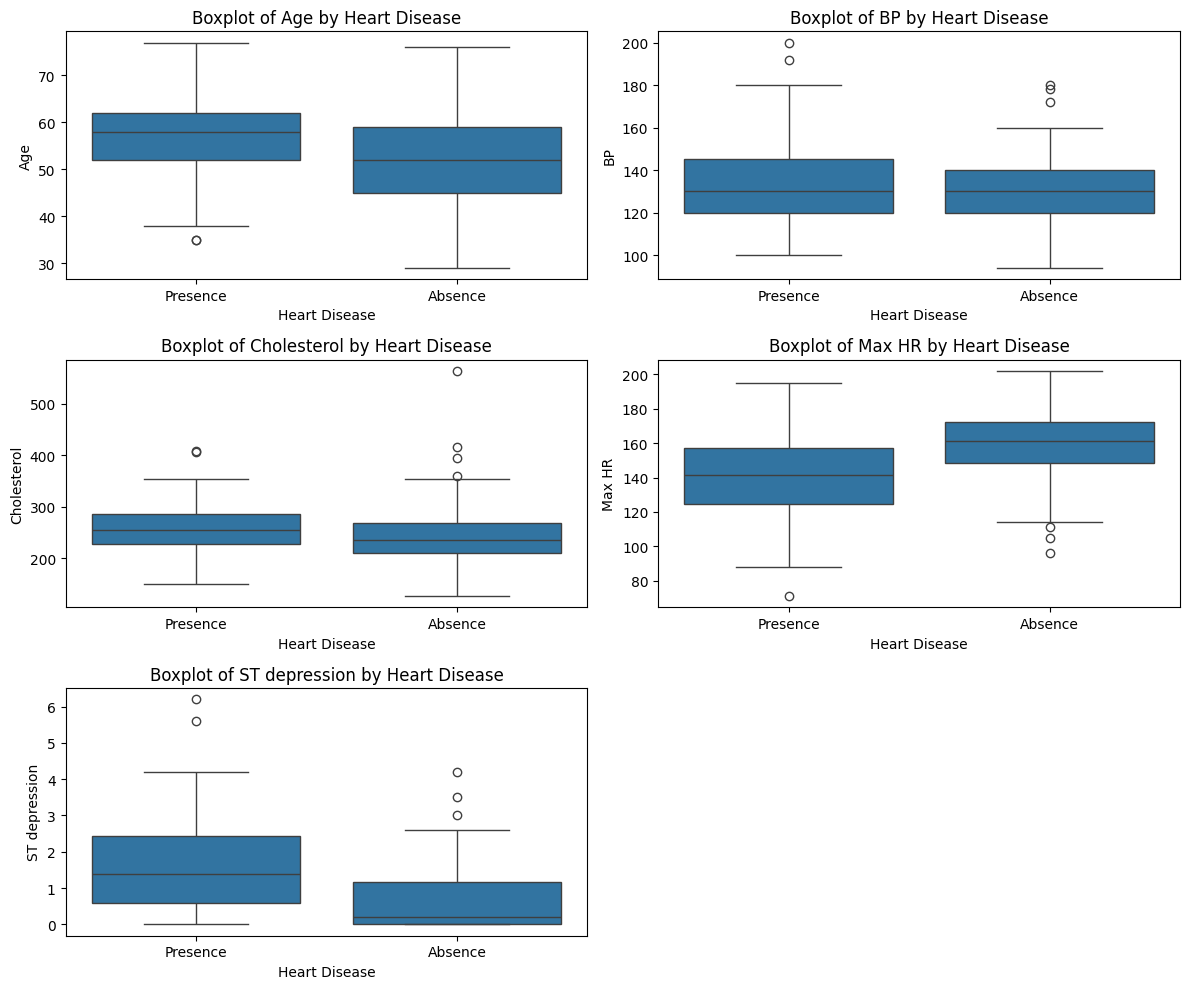

In [75]:
#using boxplot to see the differences for numerical features
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='Heart Disease', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by Heart Disease')

axs[2, 1].set_visible(False)

fig.tight_layout()

### Observations
- Patients with heart disease usually have higher ST depression values compared to those without the condition.
- Max HR tends to be lower in patients who have heart disease.
- Age, BP, and Cholesterol do not show very strong differences between the two groups, although patients with heart disease are generally a bit older.
- There are some notable outliers in Cholesterol and BP in both groups.

For categorical features, countplots can be created with Heart Disease as the hue to show how the counts are distributed within each category.

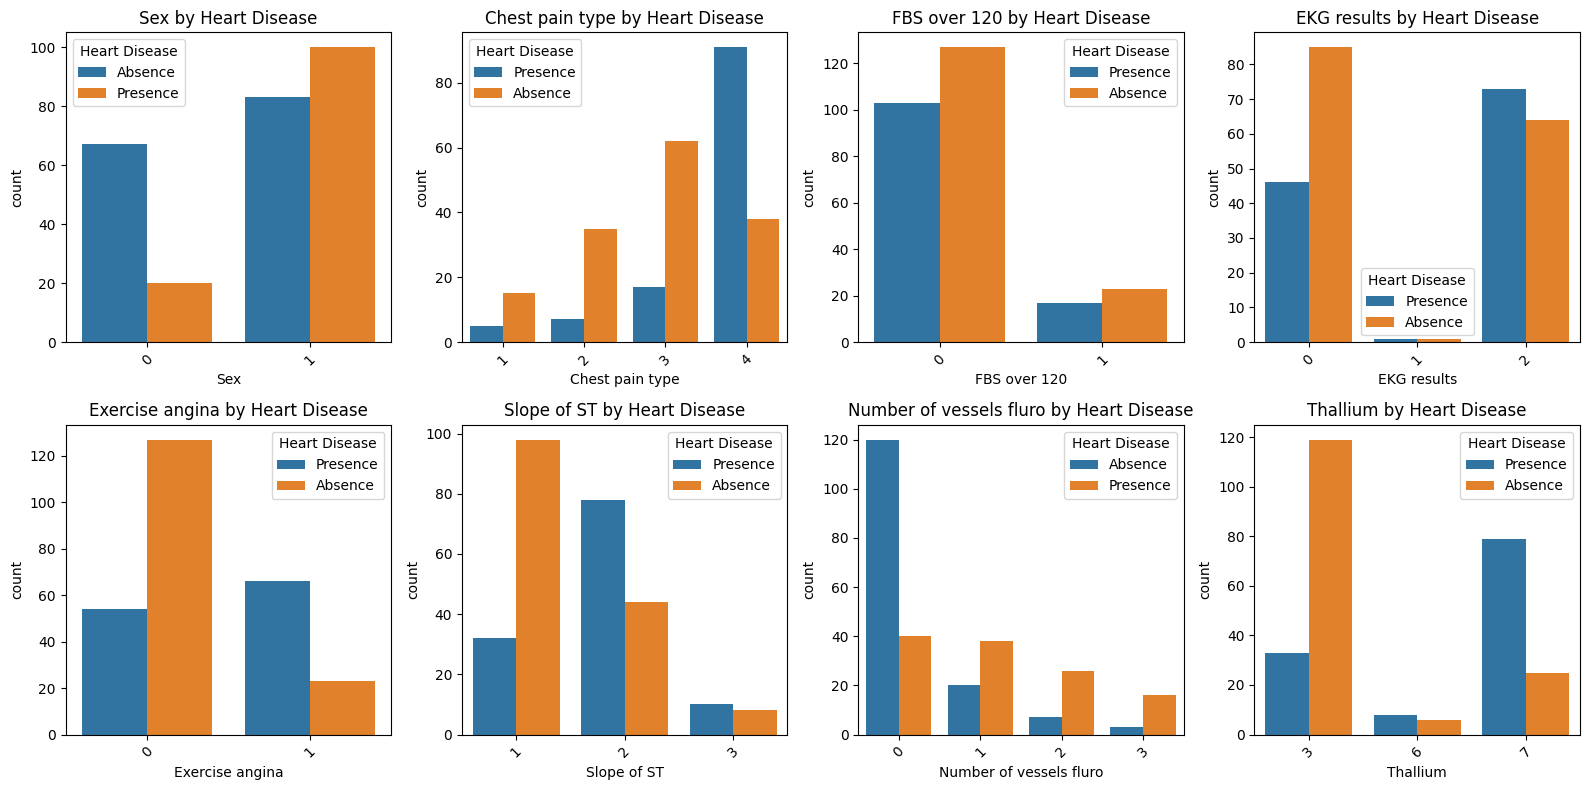

In [76]:
#using countplots for categorical features
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='Heart Disease', ax=ax)
    ax.set_title(f'{col} by Heart Disease')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

### Observations
- Sex: In this dataset, men seem to have heart disease more often than women.
- Chest pain type: Type 4 (asymptomatic) is strongly linked to heart disease, while types 1–3 appear more frequently in patients without it.
- FBS over 120: Fasting blood sugar doesn’t show a clear difference between the two groups since the proportions look similar.
- EKG results: Category 2 (left ventricular hypertrophy) shows up a bit more in patients with heart disease, while category 0 (normal) is more balanced between both groups.
- Exercise angina: Patients who have exercise-induced angina (1) tend to have heart disease more often than those who don’t (0).
- Slope of ST: A flat slope (value 2) is more common in patients with heart disease, while an upsloping value (1) appears more in patients without it.
- Number of vessels fluro: Having more vessels colored (1, 2, or 3) is related to a higher chance of heart disease, while 0 vessels is more common in patients without the condition.
- Thallium: Value 7 (reversible defect) appears more often in patients with heart disease, and value 3 (normal) is more common in those without it.

## Correlation Matrix

Using a correlation matrix to quantify the relationships between numerical features and the target variable. Before doing this, the Heart Disease column needs to be converted into numerical values.

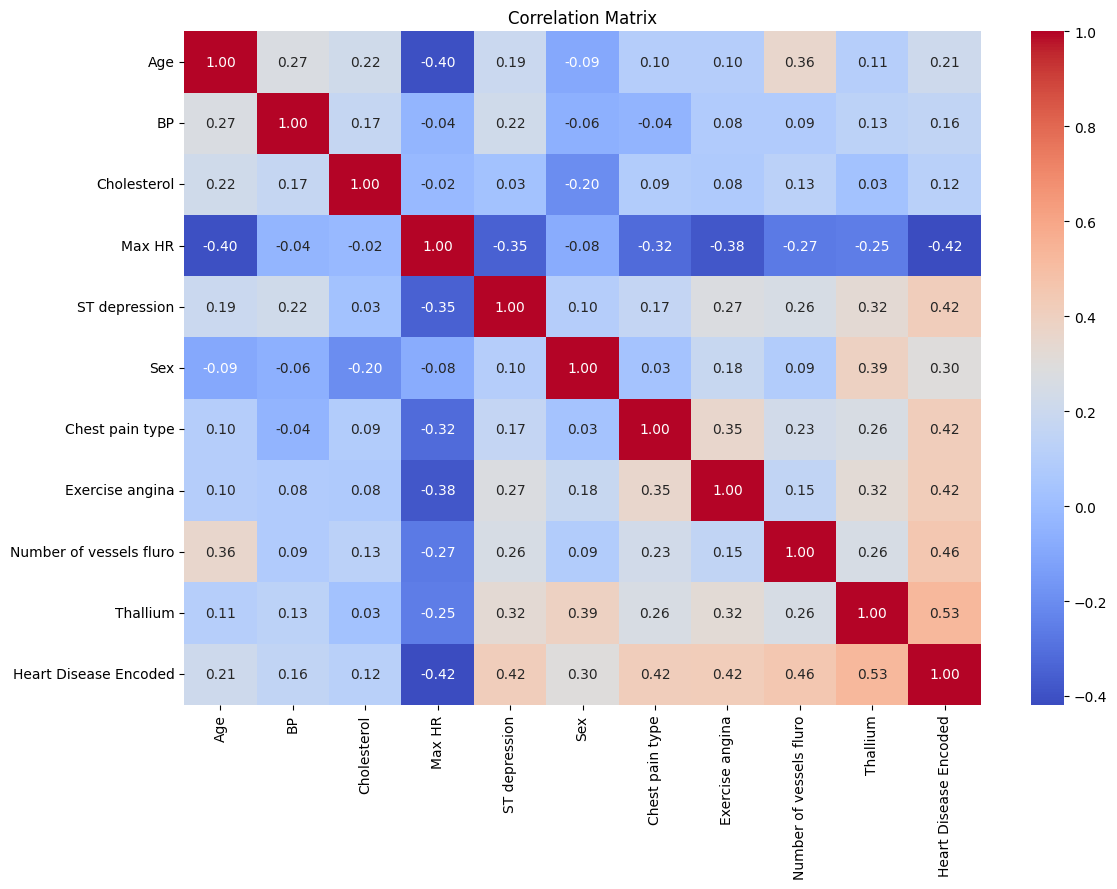

In [77]:
#target needs to be encoded first for correlation analysis
data['Heart Disease Encoded'] = (data['Heart Disease'] == 'Presence').astype(int)

corr_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 
             'Sex', 'Chest pain type', 'Exercise angina', 'Number of vessels fluro', 
             'Thallium', 'Heart Disease Encoded']

corr_matrix = data[corr_cols].corr(numeric_only=True)

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

### Observations
The features that show the strongest relationship with Heart Disease are Chest pain type, Exercise angina, Number of vessels fluro, Thallium, ST depression, and Max HR. These results are consistent with what was observed in the earlier visualizations.

## Handling Missing Values
Before creating the preprocessing pipelines, it’s necessary to check for missing values in the dataset.

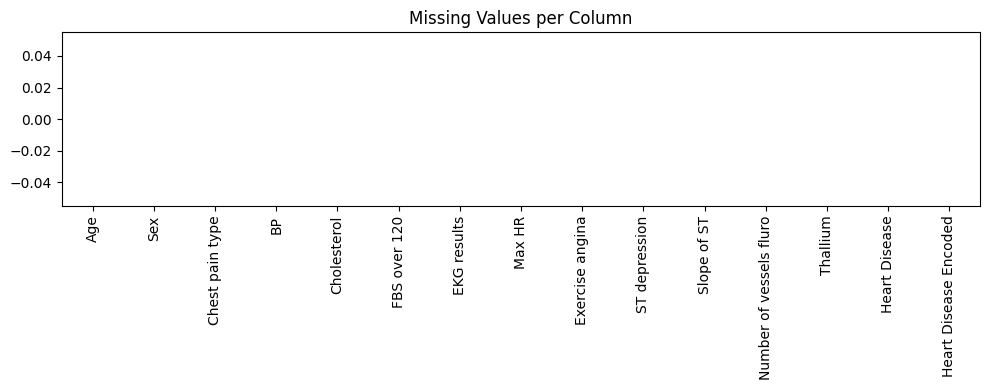

In [78]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar', figsize=(10, 4), title='Missing Values per Column')
plt.tight_layout()

In [79]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
Heart Disease Encoded      0.0
dtype: float64

### Observations
The dataset does not show missing values, which makes preprocessing easier. Even so, steps to handle missing data will still be included in the pipeline as a precaution. The mean will be used to fill missing numerical values, and the most frequent value will be used for categorical features to keep the pipeline more robust.

## Preprocessing Pipeline
After analyzing the dataset, the preprocessing pipeline can be defined. Based on the EDA results, the following transformations will be applied:

Numerical features (Age, BP, Cholesterol, Max HR): Missing values will be filled using the mean, and then standard scaling will be applied to keep the features on a similar range.

ST depression: Since most values are concentrated near 0 with some higher values extending further out, a power transformation will be applied to make the distribution more balanced, followed by standard scaling.

Categorical features (Sex, Chest pain type, FBS over 120, EKG results, Exercise angina, Slope of ST, Number of vessels fluro, Thallium): These features are already encoded as numbers, so they will pass through the pipeline with only a step to handle missing values (most frequent) as a precaution.

ColumnTransformer is used to apply different transformations to specific groups of columns in an organized way.

In [80]:
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR']
skewed_features = ['ST depression']
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                        'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), numerical_features),
            ('num_skewed', make_pipeline(PowerTransformer(), StandardScaler()), skewed_features),
            ('cat', make_pipeline(SimpleImputer(strategy='most_frequent')), categorical_features),
        ],
        remainder='drop'
    )
)

## Train-Test Split
Next, the feature matrix X and the target vector y are defined, and the dataset is split into training and testing sets. An 80–20 split is used, making sure both sets keep a similar proportion of each class.

In [81]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Heart Disease Label'] = label_encoder.fit_transform(data['Heart Disease'])

# Define feature matrix and target vector
X = data[numerical_features + skewed_features + categorical_features]
y = data['Heart Disease Label']

# Split the dataset (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The class distribution in both sets can be checked to confirm that the proportions were preserved correctly.

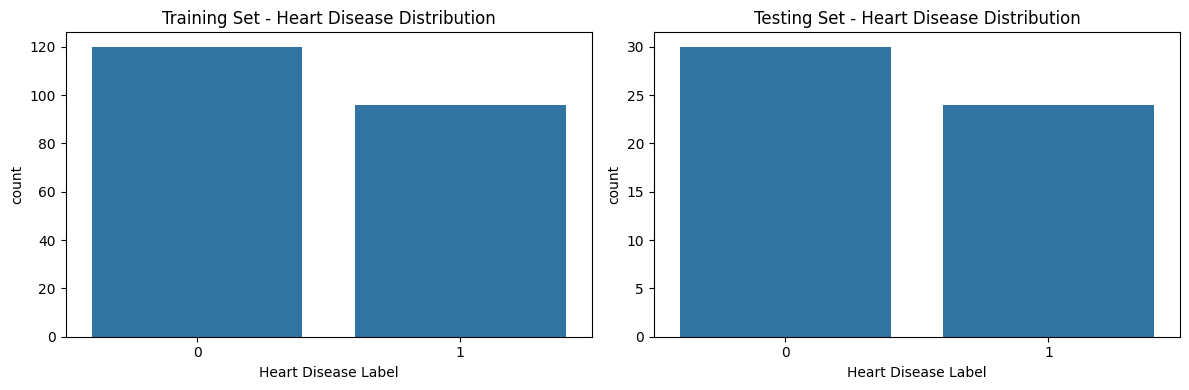

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set - Heart Disease Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set - Heart Disease Distribution')
fig.tight_layout()

## Applying the Preprocessing Pipeline
fit_transform is applied to the training data, while transform is used on the test data. It’s important not to call fit or fit_transform on the test set, since that would allow information from the test data to influence the model during training.

In [83]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_train_processed

array([[-1.3361797 , -0.63795169, -0.76298149, ...,  2.        ,
         0.        ,  3.        ],
       [-0.03903446, -0.52273633,  0.73241188, ...,  2.        ,
         2.        ,  3.        ],
       [-0.36332077, -0.63795169,  0.90719811, ...,  1.        ,
         0.        ,  3.        ],
       ...,
       [-1.44427514,  0.22616347, -0.87950564, ...,  2.        ,
         0.        ,  6.        ],
       [-0.25522534,  0.1685558 , -0.91834703, ...,  1.        ,
         1.        ,  3.        ],
       [ 0.93382446, -1.32924382,  0.4022601 , ...,  2.        ,
         2.        ,  3.        ]], shape=(216, 13))

In [84]:
X_test_processed = preprocessing_pipeline.transform(X_test)
X_test_processed

array([[ 0.06906097,  0.22616347,  0.03326693,  0.4688221 ,  0.65570026,
         0.        ,  2.        ,  0.        ,  2.        ,  0.        ,
         2.        ,  0.        ,  3.        ],
       [-1.3361797 ,  0.51420186, -0.4328297 ,  1.23190488, -1.19492579,
         1.        ,  4.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  3.        ],
       [ 0.06906097, -0.06187491,  0.26631524,  0.19949877, -1.19492579,
         1.        ,  2.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  3.        ],
       [ 0.60953815, -0.81077472, -0.35514693,  0.42393488,  0.65570026,
         1.        ,  4.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  2.        ,  7.        ],
       [-0.36332077,  0.51420186,  0.24689455,  1.59100266, -1.19492579,
         1.        ,  4.        ,  0.        ,  2.        ,  1.        ,
         1.        ,  0.        ,  3.        ],
       [ 0.50144272,  1.090278

## Building a Classification Model
Next, a complete pipeline is created by combining the preprocessing steps with a Logistic Regression classifier. By integrating preprocessing into the pipeline, the model can work directly with the raw input data.

In [85]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(max_iter=1000)
)

classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

The complete pipeline is fitted on the training data. This step first applies the preprocessing transformations and then trains the logistic regression model.

In [86]:
classification_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

With the trained model, predictions can now be made on the test set.

In [87]:
y_test_pred = classification_model.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

Finally, a DataFrame can be created to compare the predicted labels with the actual labels for each patient in the test set.

In [88]:
results = X_test.copy()
results['Heart Disease Predicted'] = label_encoder.inverse_transform(y_test_pred)
results['Heart Disease Actual'] = label_encoder.inverse_transform(y_test.values)
results

,Age,BP,Cholesterol,Max HR,ST depression,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Predicted,Heart Disease Actual
195,55,135,250,161,1.4,0,2,0,2,0,2,0,3,Absence,Absence
132,42,140,226,178,0.0,1,4,0,0,0,1,0,3,Absence,Absence
162,55,130,262,155,0.0,1,2,0,0,0,1,0,3,Absence,Absence
129,60,117,230,160,1.4,1,4,1,0,1,1,2,7,Presence,Presence
66,51,140,261,186,0.0,1,4,0,2,1,1,0,3,Absence,Absence
254,59,150,212,157,1.6,1,3,1,0,0,1,0,3,Absence,Absence
38,42,130,180,150,0.0,1,3,0,0,0,1,0,3,Absence,Absence
65,57,150,276,112,0.6,1,4,0,2,1,2,1,6,Presence,Presence
97,58,100,234,156,0.1,1,4,0,0,0,1,1,7,Presence,Presence
61,51,130,305,142,1.2,0,4,0,0,1,2,0,7,Presence,Presence
